Y_0^0


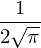

Y_1^0


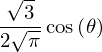

Y_1^1


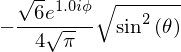

Y_2^0


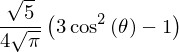

Y_2^1


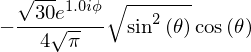

Y_2^2


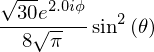

Y_3^0


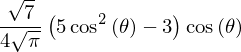

Y_3^1


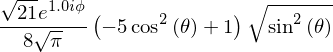

Y_3^2


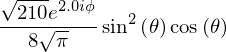

Y_3^3


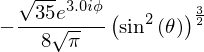

In [2]:
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sympy import var
from sympy.plotting import plot3d

sym.init_printing()

var('theta phi')

s = sym.Symbol('s')

x = sym.Symbol('x')
y = sym.Symbol('y')
z = sym.Symbol('z')
# r = sym.Symbol('r')
# theta = sym.Symbol('theta')
# phi = sym.Symbol('phi')
# a = sym.Symbol('a')

pi = sym.pi


# Associated Legendre polynomials
def P(l, m):
    f = (s**2 - 1) ** l
    
    for i in range(l+m):
        f = sym.diff(f)
    
    return (1-s**2)**sym.Rational(m/2) * f / (2**l * sym.factorial(l))


# Spherical harmonics
def Y(l, m):
    return sym.exp(1j*m*phi) * P(l, m).subs([(s, sym.cos(theta))]) \
                * (-1)**abs(m) * sym.sqrt((2*l+1)/(4*pi) * (sym.factorial(l-m))/(sym.factorial(l+m)))

    
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sympy import var, cos, sin, pi
from sympy.plotting import plot
from sympy.plotting import plot3d
from sympy.plotting import plot3d_parametric_surface as pps


for l in range(0, 4):
    for m in range(0, l+1):
        
        print('Y_' + str(l) + '^' + str(m))
        display(sym.simplify(Y(l,m)))
        
        r = abs(Y(l, m))

        x = r * sin(theta) * cos(phi)
        y = r * sin(theta) * sin(phi)
        z = r * cos(theta)

        fig = plt.figure()  # プロット領域の作成
        ax = fig.gca(projection = '3d')
        ax.set_aspect("equal")
        ax.tick_params( length = 5, colors = "blue")

        # figure サイズを8*8に
        # plt.rcParams['figure.figsize'] = 8, 8

        p = pps(x, y, z, (theta, 0, pi), (phi, 0, 2*pi) , xlim=(-0.5, 0.5), ylim=(-0.5, 0.5), zlim=(-0.5, 0.5))
        
        pp = p._backend.ax
        ax.set_aspect("equal")
                            # aspect_ratio=(1, 1))



Y_3^3


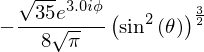

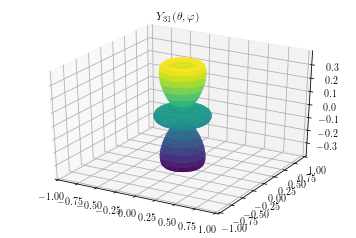

In [3]:
import sympy
from matplotlib import rc
rc('text', usetex=True)
sympy.init_printing()

print('Y_' + str(l) + '^' + str(m))
display(sym.simplify(Y(l,m)))
        
r = abs(Y(3, 1))

x = r * sin(theta) * cos(phi)
y = r * sin(theta) * sin(phi)
z = r * cos(theta)



        # fig = plt.figure()  # プロット領域の作成
ax = fig.gca(projection = '3d')
ax.set_aspect("equal")
ax.tick_params( length = 5, colors = "blue")

        # figure サイズを8*8に
        # plt.rcParams['figure.figsize'] = 8, 8

p = pps(x, y, z, (theta, 0, pi), (phi, 0, 2*pi) , 
                xlim=(-1, 1), ylim=(-1, 1),zlim=(-1, 1),
                title=r'$Y_{31}(\theta, \varphi)$', 
                keep_aspect=True, 
                aspect_ratio=(1, 1, 1),
                show=False)
        
# pp = p._backend.ax
# ax.set_aspect("equal")
# aspect_ratio=(1, 1)


p.show()
# p.save('Y31.pdf')
            

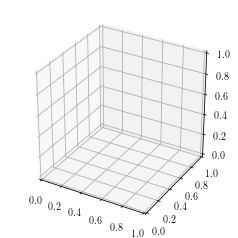

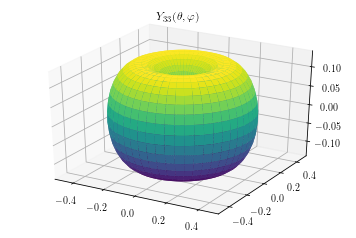

In [27]:
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sympy import var
from sympy.plotting import plot3d


fig = plt.figure()  # プロット領域の作成
ax = fig.gca(projection = '3d')
ax.set_aspect("equal")


p.show()
# ax.tick_params( length = 5, colors = "blue")

2.1.2


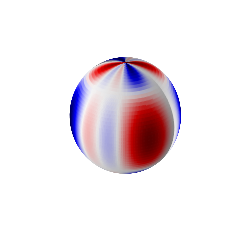

In [21]:
import matplotlib
print(matplotlib.__version__)

import numpy as np
from scipy.stats import multivariate_normal


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

from scipy.special import sph_harm

theta = np.linspace(0, 2*np.pi, 100)
phi = np.linspace(0, np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Certesian coordinates of the unit sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Calculate the spherical harmonics Y(l, m) and normalize to [0, 1]
m, l = 2, 3
fcolors = sph_harm(m, l, theta, phi).real
m2, l2 = 2, 5
fcolors2 = sph_harm(m2, l2, theta, phi).real

fcolors =  fcolors + fcolors2
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize = plt.figaspect(1.))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, 
               facecolors=cm.seismic(fcolors))

#Turn off the axis planes
ax.set_axis_off()
plt.show()



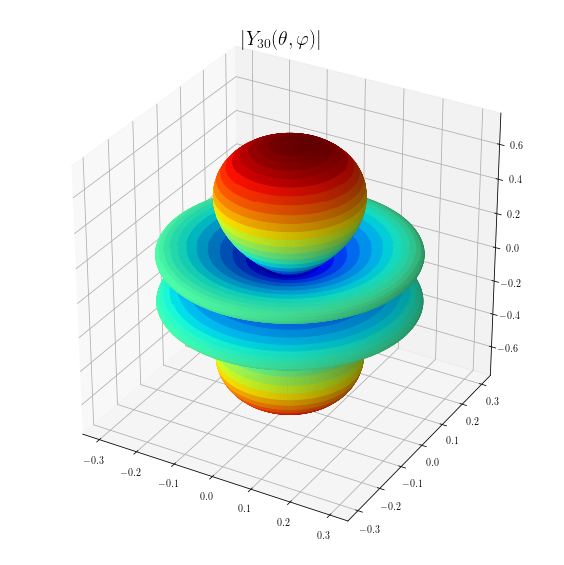

In [41]:
# http://balbuceosastropy.blogspot.com/2015/06/spherical-harmonics-in-python.html

l = 3    #degree
m = 0    # order
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j] #arrays of angular variables
R = np.abs(sph_harm(m, l, PHI, THETA)) #Array with the absolute values of Ylm
#Now we convert to cartesian coordinates
# for the 3D representation
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

N = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'),figsize = (12, 10))

im = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet( N))

ax.set_title(r'$|Y_{30} (\theta, \varphi)|$', fontsize=20)
ax.set_aspect('equal')
# ax.set_axis_off()

# m = cm.ScalarMappable(cmap=cm.jet)
# m.set_array(R)    # Assign the unnormalized data array to the mappable
                  #so that the scale corresponds to the values of R
# fig.colorbar(m, shrink=0.8);

Y_0_0
Y_1_0
Y_1_1
Y_2_0
Y_2_1
Y_2_2
Y_3_0
Y_3_1
Y_3_2
Y_3_3


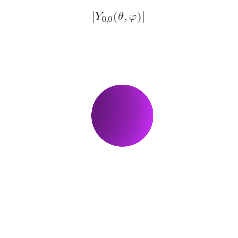

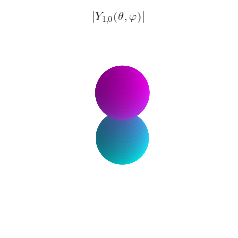

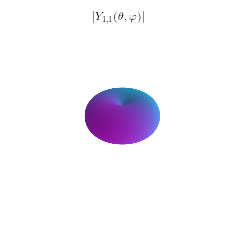

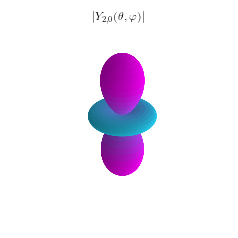

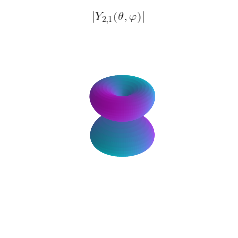

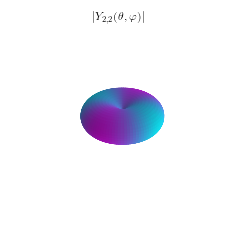

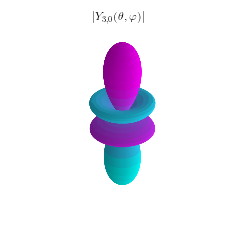

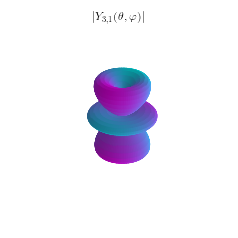

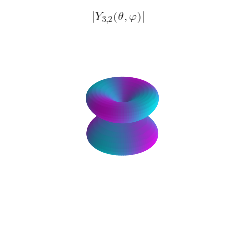

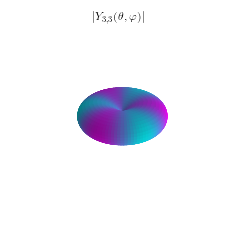

In [4]:
# http://www.magben.de/?h1=mathematik_fuer_ingenieure_mit_python&h2=kugelflaechenfunktionen

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm 

# nur fuer den Seiteneffekt: plt.gca(projection = '3d') funktioniert sonst nicht
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm

theta_1d = np.linspace(0,   np.pi,  91) # 2 GRAD Schritte
phi_1d   = np.linspace(0, 2*np.pi, 181) # 2 GRAD Schritte

theta_2d, phi_2d = np.meshgrid(theta_1d, phi_1d)
xyz_2d = np.array([np.sin(theta_2d) * np.sin(phi_2d),
                  np.sin(theta_2d) * np.cos(phi_2d),
                  np.cos(theta_2d)]) 

colormap = cm.ScalarMappable( cmap=plt.get_cmap("cool"))
colormap.set_clim(-.45, .45)
limit = 0.55

def show_Y_lm(l, m):
    print("Y_%i_%i" % (l,m)) # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$|Y_{%i, %i} (\theta, \varphi)|$" % (l,m))
    Y_lm = sph_harm(m,l, phi_2d, theta_2d)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    

# Vorsicht: diese Schleifen erzeugen 16 plots (in 16 Fenstern)!
for l in range(0,4):
    for m in range(0,l+1):
        show_Y_lm(l,m)

# show_Y_lm(l=5,m=0)
# show_Y_lm(l=5,m=4)        
# show_Y_lm(l=6,m=6)
        
plt.show()

Y_0_0


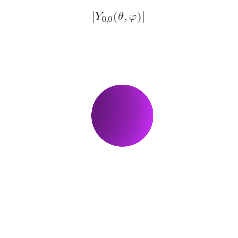

In [58]:
show_Y_lm(0,0)
plt.savefig("Y00.pdf")

Y_1_0


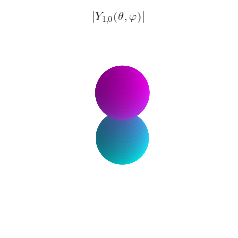

In [59]:
show_Y_lm(1,0)
plt.savefig("Y10.pdf")

Y_1_1


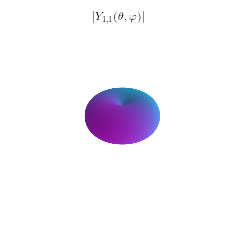

In [60]:
show_Y_lm(1,1)
plt.savefig("Y11.pdf")

Y_2_0


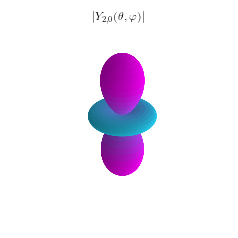

In [61]:
show_Y_lm(2,0)
plt.savefig("Y20.pdf")

Y_2_1


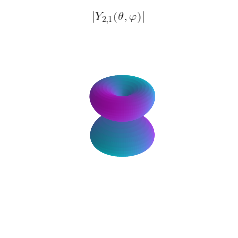

In [62]:
show_Y_lm(2,1)
plt.savefig("Y21.pdf")

Y_2_2


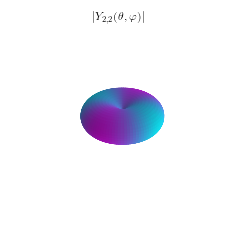

In [63]:
show_Y_lm(2,2)
plt.savefig("Y22.pdf")

Y_3_0


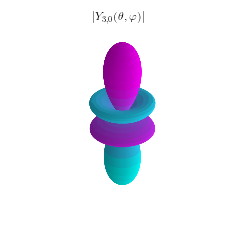

In [64]:
show_Y_lm(3,0)
plt.savefig("Y30.pdf")

Y_3_1


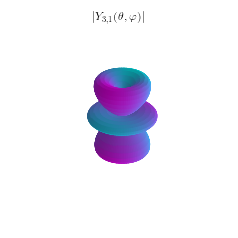

In [65]:
show_Y_lm(3,1)
plt.savefig("Y31.pdf")

Y_3_2


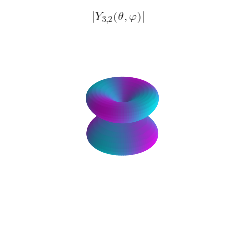

In [66]:
show_Y_lm(3,2)
plt.savefig("Y32.pdf")

Y_3_3


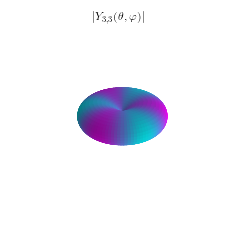

In [68]:
show_Y_lm(3,3)
plt.savefig("Y33.png")

s


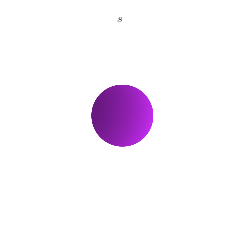

In [70]:
# s orbital
def show_s():
    print("s") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$s$")
    Y_lm = sph_harm(0,0, phi_2d, theta_2d)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_s()
# plt.savefig("s.pdf")

p_x


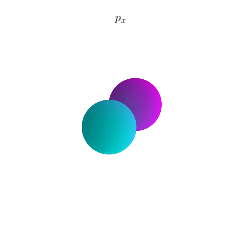

In [23]:
# px orbital
def show_px():
    print("p_x") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$p_x$")
    Y_lm = (-sph_harm(1,1, phi_2d, theta_2d) -np.conj(sph_harm(1,1, phi_2d, theta_2d))) / np.sqrt(2)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_px()
# plt.savefig("px.pdf")

p_y


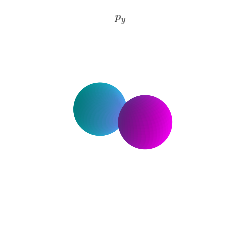

In [25]:
# py orbital
def show_py():
    print("p_y") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$p_y$")
    Y_lm = (-sph_harm(1,1, phi_2d, theta_2d) -sph_harm(-1,1, phi_2d, theta_2d)) / (np.sqrt(2)*1j)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_py()
# plt.savefig("py.pdf")

p_z


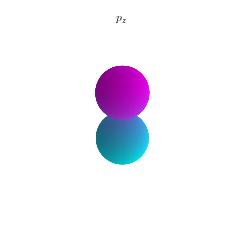

In [26]:
# pz orbital
def show_pz():
    print("p_z") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$p_z$")
    Y_lm = sph_harm(0,1, phi_2d, theta_2d)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_pz()
# plt.savefig("pz.pdf")

d_xy


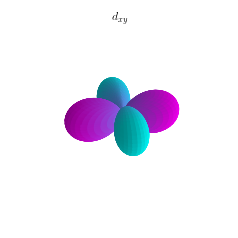

In [27]:
# dxy orbital
def show_dxy():
    print("d_xy") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$d_{xy}$")
    Y_lm = (sph_harm(2,2, phi_2d, theta_2d) - sph_harm(-2,2, phi_2d, theta_2d) ) / (np.sqrt(2) * 1j)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_dxy()
# plt.savefig("dxy.pdf")

d_yz


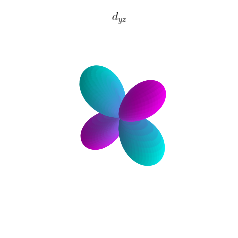

In [28]:
# dyz orbital
def show_dyz():
    print("d_yz") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$d_{yz}$")
    Y_lm = -(sph_harm(1,2, phi_2d, theta_2d) + sph_harm(-1,2, phi_2d, theta_2d) ) / (np.sqrt(2) * 1j)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_dyz()
# plt.savefig("dyz.pdf")

d_zx


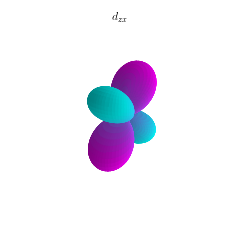

In [29]:
# dzx orbital
def show_dzx():
    print("d_zx") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$d_{zx}$")
    Y_lm = (-sph_harm(1,2, phi_2d, theta_2d) + sph_harm(-1,2, phi_2d, theta_2d) ) / (np.sqrt(2))
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_dzx()
# plt.savefig("dzx.pdf")

d_x2_y2


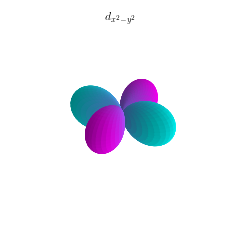

In [32]:
# dx2_y2 orbital
def show_dx2_y2():
    print("d_x2_y2") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$d_{x^2-y^2}$")
    Y_lm = (sph_harm(2,2, phi_2d, theta_2d) + sph_harm(-2,2, phi_2d, theta_2d) ) / (np.sqrt(2))
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_dx2_y2()
# plt.savefig("dx2_y2.pdf")

d_z2


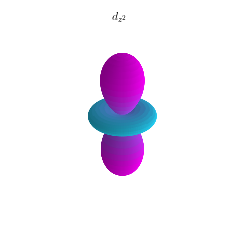

In [30]:
# dz2 orbital
def show_dz2():
    print("d_z2") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$d_{z^2}$")
    Y_lm = sph_harm(0,2, phi_2d, theta_2d)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_dz2()
# plt.savefig("dz2.pdf")

f_y_3x2_y2


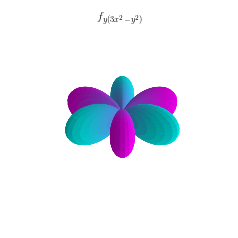

In [31]:
# f_y(3x2_y2) orbital
def show_f_y_3x2_y2():
    print("f_y_3x2_y2") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$f_{y(3x^2-y^2)}$")
    Y_lm = -(sph_harm(3,3, phi_2d, theta_2d) + sph_harm(-3,3, phi_2d, theta_2d) ) / (np.sqrt(2) * 1j)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_f_y_3x2_y2()
# plt.savefig("f_y_3x2_y2.pdf")

f_xyz


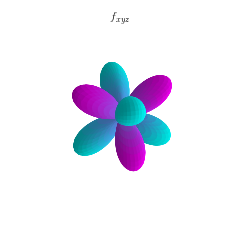

In [33]:
# f_xyz orbital
def show_f_xyz():
    print("f_xyz") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$f_{xyz}$")
    Y_lm = (sph_harm(2,3, phi_2d, theta_2d) - sph_harm(-2,3, phi_2d, theta_2d) ) / (np.sqrt(2) * 1j)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_f_xyz()
# plt.savefig("f_xyz.pdf")

f_yz2


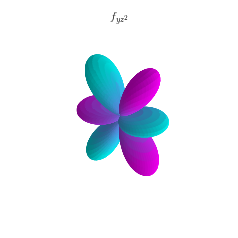

In [34]:
# f_yz2 orbital
def show_f_yz2():
    print("f_yz2") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$f_{yz^2}$")
    Y_lm = -(sph_harm(1,3, phi_2d, theta_2d) + sph_harm(-1,3, phi_2d, theta_2d) ) / (np.sqrt(2) * 1j)
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_f_yz2()
# plt.savefig("f_yz2.pdf")

f_z3


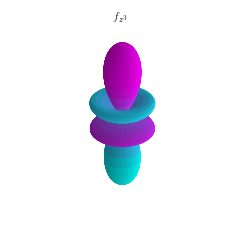

In [38]:
# f_z3 orbital
def show_f_z3():
    print("f_z3") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$f_{z^3}$")
    Y_lm = sph_harm(0,3, phi_2d, theta_2d) 
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_f_z3()
# plt.savefig("f_z3.pdf")

f_xz2


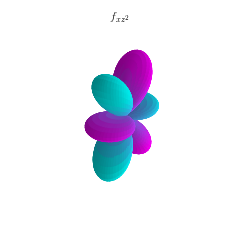

In [35]:
# f_xz2 orbital
def show_f_xz2():
    print("f_xz2") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$f_{xz^2}$")
    Y_lm = (-sph_harm(1,3, phi_2d, theta_2d) + sph_harm(-1,3, phi_2d, theta_2d) ) / (np.sqrt(2))
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_f_xz2()
# plt.savefig("f_xz2.pdf")

f_z_x2_y2


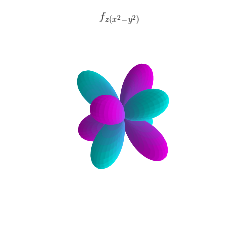

In [36]:
# f_z_x2_y2 orbital
def show_f_z_x2_y2():
    print("f_z_x2_y2") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$f_{z(x^2-y^2)}$")
    Y_lm = (sph_harm(2,3, phi_2d, theta_2d) + sph_harm(-2,3, phi_2d, theta_2d) ) / (np.sqrt(2))
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_f_z_x2_y2()
# plt.savefig("f_z_x2_y2.pdf")

f_z_x2_y2


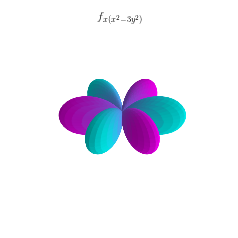

In [37]:
# f_x_x2_3y2 orbital
def show_f_x_x2_3y2():
    print("f_z_x2_y2") # zeigen, dass was passiert
    plt.figure()
    ax = plt.gca(projection = "3d")
    
    plt.title(r"$f_{x(x^2-3y^2)}$")
    Y_lm = (-sph_harm(3,3, phi_2d, theta_2d) + sph_harm(-3,3, phi_2d, theta_2d) ) / (np.sqrt(2))
    r = np.abs(Y_lm)*xyz_2d
    ax.plot_surface(r[0], r[1], r[2], 
                    facecolors=colormap.to_rgba(Y_lm.real), 
                    rstride=2, cstride=2)
    ax.set_xlim(-limit,limit)
    ax.set_ylim(-limit,limit)
    ax.set_zlim(-limit,limit)
    ax.set_aspect("equal")
    ax.set_axis_off()
    
show_f_x_x2_3y2()
# plt.savefig("f_x_x2_3y2.pdf")